In [1]:
import typing

from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle as mpl_Rectangle
from matplotlib.ticker import MultipleLocator as mpl_MultipleLocator
from nbmetalog import nbmetalog as nbm
import numpy as np
import pandas as pd
import seaborn as sns
from teeplot import teeplot as tp

from pylib.hanoi import get_hanoi_value_at_index


/usr/local/lib/python3.10/dist-packages/hstrat/_auxiliary_lib/_check_testing_requirements.py:3: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
/usr/local/lib/python3.10/dist-packages/pandera/__init__.py:40: UserWarning: Pandas and numpy have been removed from the base pandera
dependencies. Please install pandas as part of your environment's
dependencies or install the pandas extra with:

```bash
pip install pandas pandera

# or
pip install 'pandera[pandas]'
```

  warnings.warn(_warning_msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/alifedata_phyloinformatics_convert/_impl/phytrack_Systematcs.py:7: UserWarning: ImportWarning: phylotrackpy.Systematics import failed; inserting a no-op mock for Systematics. This is likely because phylotrackpy is not installed.
  w

In [2]:
nbm.print_metadata()


context: ci
hostname: fv-az1196-278
interpreter: 3.10.12 (main, May 27 2025, 17:12:29) [GCC 11.4.0]
nbcellexec: null
nbname: hanoi-strategy-small-epoch
nbpath: /home/runner/work/hstrat-surface-concept/hstrat-surface-concept/binder/hanoi-strategy-small-epoch.ipynb
revision: null
session: 2a40a069-30d0-413d-bd45-c3ca39791930
timestamp: 2025-07-05T22:19:27Z00:00


IPython==7.31.1
keyname==0.6.0
yaml==6.0.2
matplotlib==3.8.3
nbmetalog==0.2.6
numpy==1.23.5
pandas==1.5.2
seaborn==0.13.2
teeplot==__version__ = '1.4.2'
re==2.2.1
comm==0.2.2
logging==0.5.1.2
psutil==7.0.0
zmq==27.0.0
json==2.0.9
ipykernel==6.29.5


In [3]:
def lolliplot(
    data: pd.DataFrame,
    x: str,
    y: str,
    hue: str,
    stop: typing.Optional[int] = None,
    **kwargs
) -> plt.Axes:
    ax = sns.barplot(
        data=data,
        x=x,
        y=y,
        color="k",
        gap=0.6,
        **kwargs,
    )
    sns.scatterplot(
        data=data,
        x=x,
        y=y,
        hue=hue,
        palette="tab10",
        legend=False,
        **{
            "ax": ax,
            **kwargs,
        },
    )
    ax.yaxis.set_major_locator(mpl_MultipleLocator(1))
    ax.spines[["right", "top"]].set_visible(False)
    ax.set_xlabel("Time ($T$)")

    if stop is not None:
        ax.set_xticks([0, stop])
        ax.set_xticks(np.arange(0, stop, 4), minor=True)
        ax.set_xticklabels([0, stop])

    return ax


## Generate Hanoi Data


In [4]:
records = [
    {
        "index": i,
        "hanoi value": get_hanoi_value_at_index(i),
    }
    for i in range(200)
]
df = pd.DataFrame.from_records(records)


## Plot Hanoi Data


In [5]:
aspect = 2.5
height = 1.6
plt.rcParams["font.size"] = 12


teeplots/hanoi-strategy-small-epoch/hue=hanoi-value+viz=lolliplot+what=hanoi-16+x=index+y=hanoi-value+ext=.pdf
teeplots/hanoi-strategy-small-epoch/hue=hanoi-value+viz=lolliplot+what=hanoi-16+x=index+y=hanoi-value+ext=.png


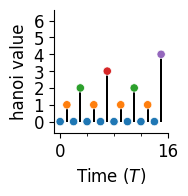

teeplots/hanoi-strategy-small-epoch/hue=hanoi-value+viz=lolliplot+what=hanoi-16+x=index+xlim=32+y=hanoi-value+ext=.pdf
teeplots/hanoi-strategy-small-epoch/hue=hanoi-value+viz=lolliplot+what=hanoi-16+x=index+xlim=32+y=hanoi-value+ext=.png


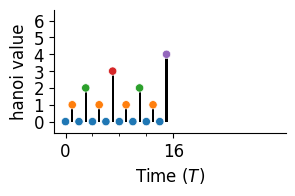

teeplots/hanoi-strategy-small-epoch/hue=hanoi-value+viz=lolliplot+what=hanoi-32+x=index+y=hanoi-value+ext=.pdf
teeplots/hanoi-strategy-small-epoch/hue=hanoi-value+viz=lolliplot+what=hanoi-32+x=index+y=hanoi-value+ext=.png


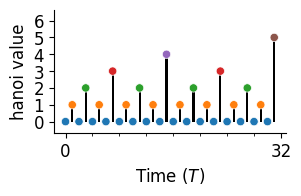

teeplots/hanoi-strategy-small-epoch/hue=hanoi-value+viz=lolliplot+what=hanoi-32+x=index+xlim=32+y=hanoi-value+ext=.pdf
teeplots/hanoi-strategy-small-epoch/hue=hanoi-value+viz=lolliplot+what=hanoi-32+x=index+xlim=32+y=hanoi-value+ext=.png


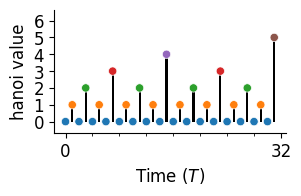

In [6]:
for lim in 16, 32:
    for xlim in None, 32:
        outattrs = {"what": f"hanoi-{lim}"}
        if xlim is not None:
            outattrs["xlim"] = xlim
        saveit, ax = tp.tee(
            lolliplot,
            df[df["index"] < lim],
            x="index",
            y="hanoi value",
            hue="hanoi value",
            stop=lim,
            teeplot_callback=True,
            teeplot_outattrs=outattrs,
            teeplot_subdir="hanoi-strategy-small-epoch",
        )

        ax.set_ylim(-0.66, 6.66)
        ax.figure.set_figheight(height)
        ax.set_aspect(aspect)

        if xlim is not None:  # set xlim as-if to account for padding
            lolliplot(
                data=df[df["index"] < xlim],
                x="index",
                y="hanoi value",
                hue="hanoi value",
                stop=lim,
                ax=ax,
                alpha=0.0,
            )

        saveit()


## Illustrate Top N Strategy


teeplots/hanoi-strategy-small-epoch/hue=hanoi-value+viz=lolliplot+what=top-n-before+x=index+y=hanoi-value+ext=.pdf
teeplots/hanoi-strategy-small-epoch/hue=hanoi-value+viz=lolliplot+what=top-n-before+x=index+y=hanoi-value+ext=.png


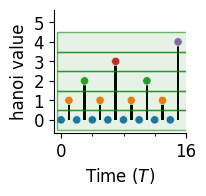

teeplots/hanoi-strategy-small-epoch/hue=hanoi-value+viz=lolliplot+what=top-n-before+x=index+xlim=32+y=hanoi-value+ext=.pdf
teeplots/hanoi-strategy-small-epoch/hue=hanoi-value+viz=lolliplot+what=top-n-before+x=index+xlim=32+y=hanoi-value+ext=.png


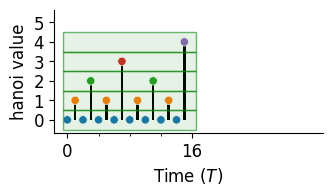

In [7]:
for xlim in None, 32:
    outattrs = {"what": "top-n-before"}
    if xlim is not None:
        outattrs["xlim"] = xlim

    saveit, ax = tp.tee(
        lolliplot,
        df[df["index"] < 16],
        x="index",
        y="hanoi value",
        hue="hanoi value",
        stop=16,
        teeplot_callback=True,
        teeplot_outattrs=outattrs,
        teeplot_subdir="hanoi-strategy-small-epoch",
    )
    if xlim is not None:  # set xlim as-if to account for padding
        lolliplot(
            data=df[df["index"] < xlim],
            x="index",
            y="hanoi value",
            hue="hanoi value",
            ax=ax,
            alpha=0.0,
        )

    ax.set_ylim(-0.66, 5.66)
    ax.figure.set_figheight(height)
    ax.set_aspect(aspect)
    xlim_ = ax.get_xlim()  # prevent rectangles from skewing padding

    for y in -0.5, 0.5, 1.5, 2.5, 3.5:
        for fill, alpha, hatch in ("green", 0.1, ""), (None, 0.5, ""):
            rect = mpl_Rectangle(
                (-0.5, y),
                width=17,
                height=1,
                alpha=alpha,
                color="green",
                fill=fill,
                hatch=hatch,
                zorder=10,
            )
            ax.add_patch(rect)

    ax.set_xlim(xlim_)
    saveit()


teeplots/hanoi-strategy-small-epoch/hue=hanoi-value+viz=lolliplot+what=top-n-after+x=index+y=hanoi-value+ext=.pdf
teeplots/hanoi-strategy-small-epoch/hue=hanoi-value+viz=lolliplot+what=top-n-after+x=index+y=hanoi-value+ext=.png


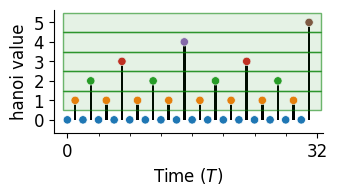

<Axes: xlabel='Time ($T$)', ylabel='hanoi value'>

In [8]:
outattrs = {"what": "top-n-after"}

saveit, ax = tp.tee(
    lolliplot,
    df[df["index"] < 32],
    x="index",
    y="hanoi value",
    hue="hanoi value",
    stop=32,
    teeplot_callback=True,
    teeplot_outattrs=outattrs,
    teeplot_subdir="hanoi-strategy-small-epoch",
)

ax.set_ylim(-0.66, 5.66)
ax.figure.set_figheight(height)
ax.set_aspect(aspect)
xlim_ = ax.get_xlim()  # prevent rectangles from skewing padding

for y in 0.5, 1.5, 2.5, 3.5, 4.5:
    for fill, alpha, hatch in ("green", 0.1, ""), (None, 0.5, ""):
        rect = mpl_Rectangle(
            (-0.5, y),
            width=33,
            height=1,
            alpha=alpha,
            color="green",
            fill=fill,
            hatch=hatch,
            zorder=10,
        )
        ax.add_patch(rect)

ax.set_xlim(xlim_)
saveit()


## Illustrate Last N Strategy


teeplots/hanoi-strategy-small-epoch/hue=hanoi-value+viz=lolliplot+what=last-n-before+x=index+y=hanoi-value+ext=.pdf
teeplots/hanoi-strategy-small-epoch/hue=hanoi-value+viz=lolliplot+what=last-n-before+x=index+y=hanoi-value+ext=.png


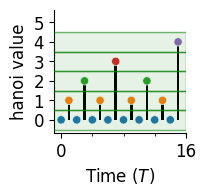

teeplots/hanoi-strategy-small-epoch/hue=hanoi-value+viz=lolliplot+what=last-n-before+x=index+xlim=32+y=hanoi-value+ext=.pdf
teeplots/hanoi-strategy-small-epoch/hue=hanoi-value+viz=lolliplot+what=last-n-before+x=index+xlim=32+y=hanoi-value+ext=.png


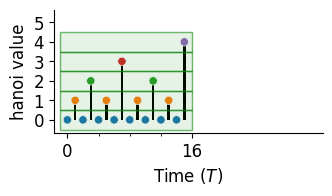

In [9]:
for xlim in None, 32:
    outattrs = {"what": "last-n-before"}
    if xlim is not None:
        outattrs["xlim"] = xlim

    saveit, ax = tp.tee(
        lolliplot,
        df[df["index"] < 16],
        x="index",
        y="hanoi value",
        hue="hanoi value",
        stop=16 ,
        teeplot_callback=True,
        teeplot_outattrs=outattrs,
        teeplot_subdir="hanoi-strategy-small-epoch",
    )
    if xlim is not None:  # set xlim as-if to account for padding
        lolliplot(
            data=df[df["index"] < xlim],
            x="index",
            y="hanoi value",
            hue="hanoi value",
            ax=ax,
            alpha=0.0,
        )

    ax.set_ylim(-0.66, 5.66)
    ax.figure.set_figheight(height)
    ax.set_aspect(aspect)
    xlim_ = ax.get_xlim()  # prevent rectangles from skewing padding

    for y, dx in (0, 17), (1, 17), (2, 17), (3, 17), (4, 17):
        rect = mpl_Rectangle(
            (16 - dx, y - 0.5),
            width=dx,
            height=1,
            alpha=0.1,
            color="green",
            zorder=10,
        )
        ax.add_patch(rect)
        rect = mpl_Rectangle(
            (16 - dx, y - 0.5),
            width=dx,
            height=1,
            alpha=0.5,
            color="green",
            fill=None,
            zorder=10,
        )
        ax.add_patch(rect)

    ax.set_xlim(xlim_)
    saveit()


teeplots/hanoi-strategy-small-epoch/hue=hanoi-value+viz=lolliplot+what=last-n-after+x=index+y=hanoi-value+ext=.pdf
teeplots/hanoi-strategy-small-epoch/hue=hanoi-value+viz=lolliplot+what=last-n-after+x=index+y=hanoi-value+ext=.png


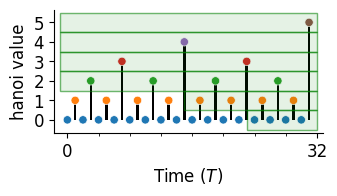

<Axes: xlabel='Time ($T$)', ylabel='hanoi value'>

In [10]:
outattrs = {"what": "last-n-after"}

saveit, ax = tp.tee(
    lolliplot,
    df[df["index"] < 32],
    x="index",
    y="hanoi value",
    hue="hanoi value",
    stop=32,
    teeplot_callback=True,
    teeplot_outattrs=outattrs,
    teeplot_subdir="hanoi-strategy-small-epoch",
)

ax.set_ylim(-0.66, 5.66)
ax.figure.set_figheight(height)
ax.set_aspect(aspect)
xlim_ = ax.get_xlim()  # prevent rectangles from skewing padding

for y, dx in (0, 9), (1, 17), (2, 33), (3, 33), (4, 33), (5, 33):
    rect = mpl_Rectangle(
        (32 - dx, y - 0.5),
        width=dx,
        height=1,
        alpha=0.1,
        color="green",
        zorder=10,
    )
    ax.add_patch(rect)
    rect = mpl_Rectangle(
        (32 - dx, y - 0.5),
        width=dx,
        height=1,
        alpha=0.5,
        color="green",
        fill=None,
        zorder=10,
    )
    ax.add_patch(rect)

ax.set_xlim(xlim_)
saveit()


## Illustrate First N Strategy


teeplots/hanoi-strategy-small-epoch/hue=hanoi-value+viz=lolliplot+what=first-n-before+x=index+y=hanoi-value+ext=.pdf
teeplots/hanoi-strategy-small-epoch/hue=hanoi-value+viz=lolliplot+what=first-n-before+x=index+y=hanoi-value+ext=.png


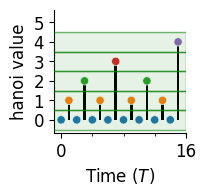

teeplots/hanoi-strategy-small-epoch/hue=hanoi-value+viz=lolliplot+what=first-n-before+x=index+xlim=32+y=hanoi-value+ext=.pdf
teeplots/hanoi-strategy-small-epoch/hue=hanoi-value+viz=lolliplot+what=first-n-before+x=index+xlim=32+y=hanoi-value+ext=.png


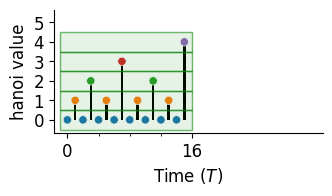

In [11]:
for xlim in None, 32:
    outattrs = {"what": "first-n-before"}
    if xlim is not None:
        outattrs["xlim"] = xlim
    saveit, ax = tp.tee(
        lolliplot,
        df[df["index"] < 16],
        x="index",
        y="hanoi value",
        hue="hanoi value",
        stop=16,
        teeplot_callback=True,
        teeplot_outattrs=outattrs,
        teeplot_subdir="hanoi-strategy-small-epoch",
    )
    if xlim is not None:  # set xlim as-if to account for padding
        lolliplot(
            data=df[df["index"] < xlim],
            x="index",
            y="hanoi value",
            hue="hanoi value",
            ax=ax,
            alpha=0.0,
        )

    ax.set_ylim(-0.66, 5.66)
    ax.figure.set_figheight(height)
    ax.set_aspect(aspect)
    xlim_ = ax.get_xlim()  # prevent rectangles from skewing padding


    for y, dx in (0, 17), (1, 17), (2, 17), (3, 17), (4, 17):
        rect = mpl_Rectangle(
            (-1, y - 0.5),
            width=dx,
            height=1,
            alpha=0.1,
            color="green",
            zorder=10,
        )
        ax.add_patch(rect)
        rect = mpl_Rectangle(
            (-1, y - 0.5),
            width=dx,
            height=1,
            alpha=0.5,
            color="green",
            fill=None,
            zorder=10,
        )
        ax.add_patch(rect)

    ax.set_xlim(xlim_)
    saveit()


teeplots/hanoi-strategy-small-epoch/hue=hanoi-value+viz=lolliplot+what=first-n-after+x=index+y=hanoi-value+ext=.pdf
teeplots/hanoi-strategy-small-epoch/hue=hanoi-value+viz=lolliplot+what=first-n-after+x=index+y=hanoi-value+ext=.png


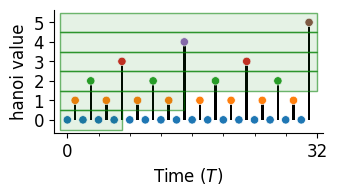

<Axes: xlabel='Time ($T$)', ylabel='hanoi value'>

In [12]:
outattrs = {"what": "first-n-after"}

saveit, ax = tp.tee(
    lolliplot,
    df[df["index"] < 32],
    x="index",
    y="hanoi value",
    hue="hanoi value",
    stop=32,
    teeplot_callback=True,
    teeplot_outattrs=outattrs,
    teeplot_subdir="hanoi-strategy-small-epoch",
)

ax.set_ylim(-0.66, 5.66)
ax.figure.set_figheight(height)
ax.set_aspect(aspect)
xlim_ = ax.get_xlim()  # prevent rectangles from skewing padding

for y, dx in (0, 8), (1, 16), (2, 33), (3, 33), (4, 33), (5, 33):
    rect = mpl_Rectangle(
        (-1, y - 0.5),
        width=dx,
        height=1,
        alpha=0.1,
        color="green",
        zorder=10,
    )
    ax.add_patch(rect)
    rect = mpl_Rectangle(
        (-1, y - 0.5),
        width=dx,
        height=1,
        alpha=0.5,
        color="green",
        fill=None,
        zorder=10,
    )
    ax.add_patch(rect)

ax.set_xlim(xlim_)
saveit()
